In [139]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np


import pandas as pd

In [140]:
training = pd.read_csv("test.csv")

training.pop('duration')


training = training.replace({'housing': {'yes': 1, 
                                'no': 0}})

training = training.replace({'loan': {'yes': 1, 
                                'no': 0}})


training = training.replace({'y': {'yes': 1, 
                                'no': 0}})


training = training.replace({'default': {'yes': 1, 
                                'no': 0}})



training_i = training.pop('y')


arr_train = training.to_numpy()

arr_train_i = training_i.to_numpy()


print(training)


X_train, X_test, Y_train, Y_test = train_test_split(
    arr_train, arr_train_i, test_size=0.3, random_state=0, shuffle=True)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train.shape)
print(X_test.shape)





      age  marital  education  default  balance  housing  loan  contact  \
0      33        1          2        0      882        0     0        1   
1      42        0          1        0     -247        1     1        1   
2      33        1          1        0     3444        1     0        1   
3      36        1          2        0     2415        1     0        1   
4      36        1          2        0        0        1     0        1   
...   ...      ...        ...      ...      ...      ...   ...      ...   
7837   34        0          1        0     1475        1     0        0   
7838   53        1          2        0      583        0     0        0   
7839   73        1          1        0     2850        0     0        0   
7840   72        1          1        0     5715        0     0        0   
7841   37        1          1        0     2971        0     0        0   

      campaign  pdays  previous  poutcome  
0            1    151         3         0  
1          

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand t

Text(0.5, 0, 'epochs')

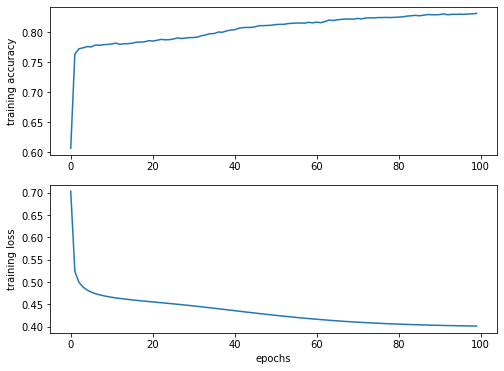

In [141]:

model1 = keras.Sequential()

model1.add(layers.InputLayer(input_shape=(12)))

model1.add(layers.Dense(24, activation="relu"))


model1.add(layers.Dense(1, activation="sigmoid")) 

model1.summary()


# Compile the model.
model_training_history=model1.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)



model_training_history=model1.fit(
    X_train, 
    Y_train, 
    epochs=100)



print(model_training_history.history.keys())


import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))


acc = model_training_history.history['accuracy']
loss = model_training_history.history['loss']


ax1.plot(acc)
ax2.plot(loss)
    

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')


ax2.set_xlabel('epochs')


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
74/74 [==============================] - 0s 267us/step - loss: 0.4127 - accuracy: 0.8181
0.41265973448753357 0.8181045651435852
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this

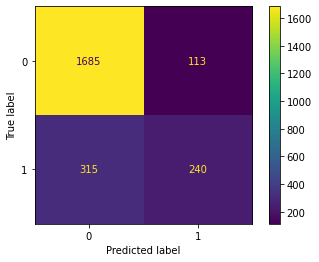

In [142]:
test_loss, test_acc = model1.evaluate(X_test, Y_test)
print(test_loss, test_acc)

y_pred = model1.predict(X_test)


# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(Y_test, np.round(y_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred)).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")


acc = (tp + tn) / (tp+fp+tn+fn)
spec = tn / (tn+fp)
sens = tp / (tp+fn)
prec = tp / (tp+fp)

f1 = 2 * ((prec * sens)/(prec + sens))



print(f"Accuracy: {acc}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")
print(f"Precision: {prec}")
print(f"F1-Score: {f1}")

ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred))





Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_239 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_240 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_241 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

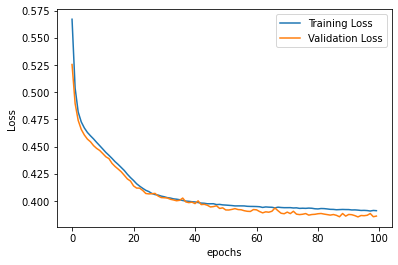

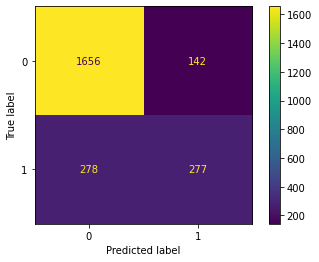

In [144]:
X_train2 = X_train
X_test2 = X_train
Y_train2 = Y_train
Y_test2 = Y_train


x_val = X_train2[:900] # Grab from 0 -> 1000
y_val = Y_train2[:900]

x_train_enc_rest = X_train2[900:] # From 1000 -> end
y_train_enc_rest = Y_train2[900:]


model2 = keras.Sequential()

model2.add(layers.Dense(10, activation = 'relu', input_dim = 12))

model2.add(layers.Dense(10, activation = 'relu'))
 
model2.add(layers.Dense(1, activation = 'sigmoid'))

model2.summary()



# Compile the model.
model_training_history2=model2.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)



model_training_history2=model2.fit(
    X_train2, 
    Y_train2, 
    batch_size=10,
    epochs=100,
    validation_data = (x_val, y_val))




import matplotlib.pyplot as plt

loss = model_training_history2.history['loss']
val_loss = model_training_history2.history['val_loss']

plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
    
# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')

# Draw a red vertical line at x=60.
#plt.axvline(x=60, color='red')

# Display a legend.
plt.legend()



test_loss, test_acc = model2.evaluate(X_test, Y_test)
print(test_loss, test_acc)

y_pred = model2.predict(X_test)


# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(Y_test, np.round(y_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.






ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred))




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


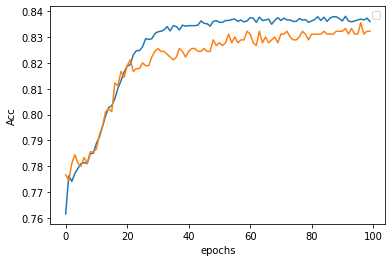

In [145]:
plt.plot(model_training_history2.history['accuracy'])
plt.plot(model_training_history2.history['val_accuracy'])

plt.ylabel('Acc')
plt.xlabel('epochs')
plt.legend()


In [146]:
tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred)).ravel()




print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")


acc = (tp + tn) / (tp+fp+tn+fn)
spec = tn / (tn+fp)
sens = tp / (tp+fn)
prec = tp / (tp+fp)

f1 = 2 * ((prec * sens)/(prec + sens))


print(f"Accuracy: {acc}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")
print(f"Precision: {prec}")
print(f"F1-Score: {f1}") 

TP: 277
FP: 142
TN: 1656
FN: 278
Accuracy: 0.8215044623884403
Specificity: 0.9210233592880979
Sensitivity: 0.4990990990990991
Precision: 0.6610978520286396
F1-Score: 0.568788501026694


In [162]:
training3 = pd.read_csv("test.csv")

training3.pop('duration')

training3.pop('default')

training3.pop('pdays')

training3.pop ('previous')

training3 = training3.replace({'housing': {'yes': 1, 
                                'no': 0}})

training3 = training3.replace({'loan': {'yes': 1, 
                                'no': 0}})


training3 = training3.replace({'y': {'yes': 1, 
                                'no': 0}})


training_i3 = training3.pop('y')


arr_train3 = training3.to_numpy()

arr_train_i3 = training_i3.to_numpy()




X_train3, X_test3, Y_train3, Y_test3 = train_test_split(
    arr_train3, arr_train_i3, test_size=0.3, random_state=0, shuffle=True)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)


print(X_train3.shape)
print(X_test3.shape)


(5489, 9)
(2353, 9)


Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_340 (Dense)            (None, 10)                100       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_341 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_342 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_343 (Dense)            (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export A

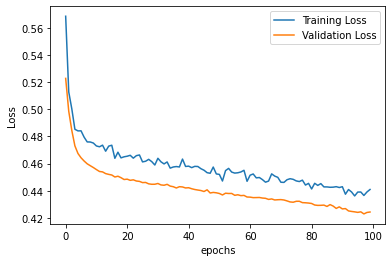

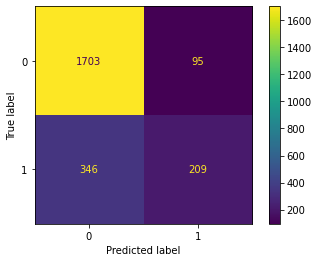

In [196]:
x_val3 = X_train3[:900] # Grab from 0 -> 1000
y_val3 = Y_train3[:900]

x_train_enc_rest3 = X_train3[900:] # From 1000 -> end
y_train_enc_rest3 = Y_train3[900:]


model3 = keras.Sequential()

model3.add(layers.Dense(10, activation = 'relu', input_dim = 9))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(10, activation = 'relu'))

model3.add(layers.Dense(10, activation = 'relu'))

model3.add(layers.Dense(1, activation = 'sigmoid'))

model3.summary()



# Compile the model.
model_training_history3=model3.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)



model_training_history3=model3.fit(
    X_train3, 
    Y_train3, 
    batch_size=20,
    epochs=100,
    validation_data = (x_val3, y_val3))




import matplotlib.pyplot as plt

loss3 = model_training_history3.history['loss']
val_loss3 = model_training_history3.history['val_loss']

plt.plot(loss3, label="Training Loss")
plt.plot(val_loss3, label="Validation Loss")
    
# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')

# Draw a red vertical line at x=60.
#plt.axvline(x=60, color='red')

# Display a legend.
plt.legend()



test_loss3, test_acc3 = model3.evaluate(X_test3, Y_test3)
print(test_loss3, test_acc3)

y_pred3 = model3.predict(X_test3)


# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(Y_test3, np.round(y_pred3) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.






ConfusionMatrixDisplay.from_predictions(Y_test3, np.round(y_pred3))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TP: 277
FP: 142
TN: 1656
FN: 278
Accuracy: 0.8215044623884403
Specificity: 0.9210233592880979
Sensitivity: 0.4990990990990991
Precision: 0.6610978520286396
F1-Score: 0.568788501026694


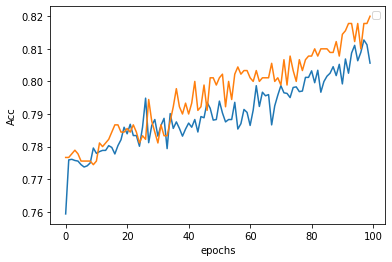

In [197]:
plt.plot(model_training_history3.history['accuracy'])
plt.plot(model_training_history3.history['val_accuracy'])

plt.ylabel('Acc')
plt.xlabel('epochs')
plt.legend()

tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred)).ravel()




print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")


acc = (tp + tn) / (tp+fp+tn+fn)
spec = tn / (tn+fp)
sens = tp / (tp+fn)
prec = tp / (tp+fp)

f1 = 2 * ((prec * sens)/(prec + sens))


print(f"Accuracy: {acc}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")
print(f"Precision: {prec}")
print(f"F1-Score: {f1}") 

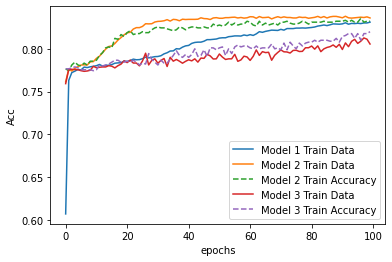

In [200]:
plt.plot(model_training_history.history['accuracy'], label="Model 1 Train Data")

plt.plot(model_training_history2.history['accuracy'], label= "Model 2 Train Data")
plt.plot(model_training_history2.history['val_accuracy'], '--', label= "Model 2 Train Accuracy")

plt.plot(model_training_history3.history['accuracy'],label= "Model 3 Train Data")
plt.plot(model_training_history3.history['val_accuracy'], '--', label= "Model 3 Train Accuracy")

plt.ylabel('Acc')
plt.xlabel('epochs')
plt.legend()

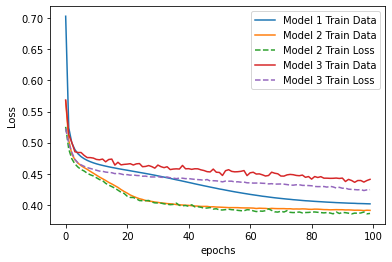

In [201]:
plt.plot(model_training_history.history['loss'], label="Model 1 Train Data")

plt.plot(model_training_history2.history['loss'], label= "Model 2 Train Data")
plt.plot(model_training_history2.history['val_loss'], '--', label= "Model 2 Train Loss")

plt.plot(model_training_history3.history['loss'],label= "Model 3 Train Data")
plt.plot(model_training_history3.history['val_loss'], '--', label= "Model 3 Train Loss")

plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend()